In [1]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_flink.csv')
df.head(2)

,commit_befor,commit_after,cal_smell,open_time,closed_time,cal_time,changed_file,additions,deletions,dev
0,8,5,-3,9/1/2015 22:25,8/24/2016 17:09,357 days 18:44:00,45,429.0,253,1
1,9,8,-1,2/5/2018 4:58,4/5/2018 21:07,59 days 16:09:00,15,843.0,327,2


In [3]:
df_drop_nan = df.dropna()

In [4]:
df.dtypes

commit_befor       int64
commit_after       int64
cal_smell          int64
open_time         object
closed_time       object
cal_time          object
changed_file       int64
additions        float64
deletions          int64
dev                int64
dtype: object

In [5]:
df['cal_time'] = pd.to_numeric(df.cal_time.str[:-14] , downcast='integer')

In [6]:
df['cal_time'] 


0     357
1      59
2     121
3       7
4       3
5      15
6      18
7       6
8       6
9       4
10      4
11      0
12      0
13     63
14      3
15     20
16     80
17      0
18      3
19    100
20     12
21     30
22    249
23     19
24      4
25    -36
26     23
27     33
28      6
29     48
Name: cal_time, dtype: int16

In [7]:
data_time_of_day = df['cal_time'].values

In [8]:
data_time_of_day

array([357,  59, 121,   7,   3,  15,  18,   6,   6,   4,   4,   0,   0,
        63,   3,  20,  80,   0,   3, 100,  12,  30, 249,  19,   4, -36,
        23,  33,   6,  48], dtype=int16)

In [9]:
X ,y = df_drop_nan.iloc[:, [True, True,  True, False, False,False, True, True, True, True]] , data_time_of_day

In [10]:
X.shape

(30, 7)

In [11]:
y.shape

(30,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=5)

# Create a k-NN classifier with 6 time

In [13]:
from sklearn.metrics import classification_report , confusion_matrix
from matplotlib import pyplot as plt

In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [15]:
knn.fit(X_train ,y_train)

KNeighborsClassifier()

In [16]:
new_prediction = knn.predict(X_test)
print("Prediction: {}".format(new_prediction))

Prediction: [3 0 3 4 0 0 0 0 3]


In [17]:
y_pred = knn.predict(X_test)

In [18]:
print(knn.score(X_test, y_test))

0.0


In [19]:
time = np.arange(1, 9)
train_accuracy = np.empty(len(time))
test_accuracy = np.empty(len(time))

In [20]:
for i , k in enumerate(time) :
    knn = KNeighborsClassifier(k)
    knn.fit(X_train ,y_train)
    train_accuracy[i] = knn.score(X_train , y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


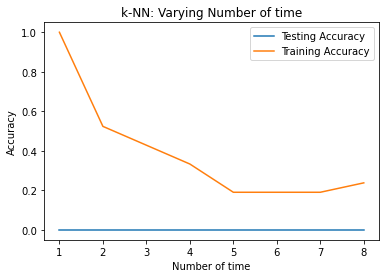

In [21]:
plt.title('k-NN: Varying Number of time')
plt.plot(time, test_accuracy, label = 'Testing Accuracy')
plt.plot(time, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of time')
plt.ylabel('Accuracy')
plt.show()

In [22]:
#HOw to good model

In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test , y_pred))

[[0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

         -36       0.00      0.00      0.00       1.0
           0       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          63       0.00      0.00      0.00       1.0
         121       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0



C:\Users\Beauz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beauz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beauz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
reg = LinearRegression()

In [26]:
reg.fit(X , y )

LinearRegression()

In [27]:
print(reg.score(X, y))

0.2619533096737451


In [28]:
reg_all = LinearRegression()

In [29]:
reg_all.fit(X_train , y_train)

LinearRegression()

In [30]:
print(reg_all.score(X_train , y_train))

0.35536610031338767


In [31]:
y_pred = reg_all.predict(X_test)

In [32]:
print("R^2 of reg_all: {}".format(reg_all.score(X_test, y_test)))
print("R^2 of reg: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2 of reg_all: -2.029516300809882
R^2 of reg: -0.25356338636919484
Root Mean Squared Error: 74.42548383333805


Cross-validation

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [34]:
reg = LinearRegression()

In [35]:
cv_scores = cross_val_score(reg , X  ,y , cv = 5)

In [36]:
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-9.85370883e-02 -1.49304173e+02 -2.13792101e+01 -4.91196395e-02
 -2.28253544e+00]
Average 5-Fold CV Score: -34.622715131665196


Regularization I: Lasso

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso = Lasso(alpha = 0.4 , normalize=True)

In [39]:
lasso.fit( X ,y )

Lasso(alpha=0.4, normalize=True)

In [40]:
lasso_coef =  lasso.fit( X ,y ).coef_
print(lasso_coef)

[ 0.00000000e+00  2.36557031e+00  0.00000000e+00 -0.00000000e+00
 -7.93616898e-05 -4.66829632e-03 -5.94089949e+01]


In [41]:

#plt.plot(range(len(X_train)), lasso_coef)
#plt.xticks(range(len(X_train)), X_train.values, rotation=60)
#plt.margins(0.02)
#plt.show()

necessary modules

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from matplotlib import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

from sklearn.metrics import classification_report , confusion_matrix


In [43]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [44]:
ridge = Ridge(normalize=True)

In [45]:
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))


In [46]:
#display_plot(ridge_scores, ridge_scores_std)

SGD MODEL

In [47]:
shuffle_index = np.random.permutation(5)
shuffle_index

array([1, 2, 4, 0, 3])

In [48]:
#X_train_shuffle , y_train_shufle = X_train.iloc[shuffle_index] , y_train.iloc[shuffle_index]

In [49]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state =5)


#ROC curve

In [50]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf , X_train , y_train , cv = 3)

C:\Users\Beauz\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_train , y_train_pred)

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [53]:
y_train_perfect_predition = y_train

In [54]:
#confusion_matrix(y_train_perfect_predition)

In [55]:
from sklearn.metrics import precision_score , recall_score

In [56]:
#precision_score(y_train , y_train_pred)

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score